<a href="https://colab.research.google.com/github/divsal009/div/blob/master/Chest_X_ray_Pneumonia_or_not_ipnyb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import numpy as np
import os
import matplotlib.pyplot as plt
from PIL import Image

In [18]:
# Deep Learning 
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Conv2D, MaxPooling2D, Flatten
from keras.layers import Dropout, ZeroPadding2D

In [19]:
import tensorflow as tf
tf.test.gpu_device_name()

''

In [35]:
os.listdir('/content/drive/My Drive/Medical Data/chest_xray')


['test', 'train', 'val']

In [36]:
train_folder = "/content/drive/My Drive/Medical Data/chest_xray/train/"
train_n = train_folder + 'NORMAL/'
train_p = train_folder + 'PNEUMONIA/'


# **Load and display X ray images**

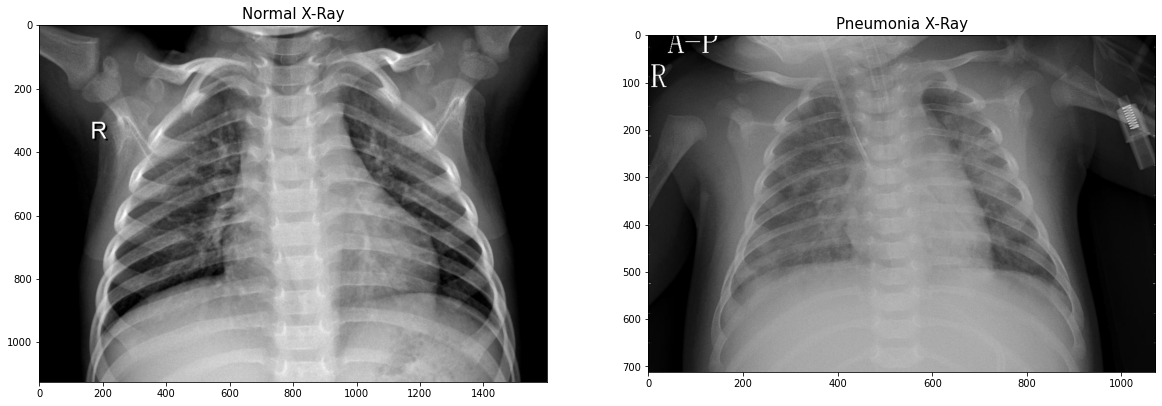

In [39]:
# Open & Read XRay data using Image
norm_image = Image.open('/content/drive/My Drive/Medical Data/chest_xray/train/NORMAL/IM-0125-0001.jpeg')
pneumonia_image = Image.open('/content/drive/My Drive/Medical Data/chest_xray/val/PNEUMONIA/person1946_bacteria_4875.jpeg')

# Lets plot both Images using Subplotting
fig = plt.figure(figsize=(20,10))
a1 = fig.add_subplot(1, 2, 1)
img_plot = plt.imshow(norm_image, cmap = 'gray')
a1.set_title("Normal X-Ray", fontsize = 15)

a1 = fig.add_subplot(1, 2, 2)
img_plot = plt.imshow(pneumonia_image, cmap = 'gray')
a1.set_title("Pneumonia X-Ray", fontsize = 15)
plt.show()


In [40]:
train_folder='/content/drive/My Drive/Medical Data/chest_xray/train'
test_folder='/content/drive/My Drive/Medical Data/chest_xray/test'
val_folder='/content/drive/My Drive/Medical Data/chest_xray/val'

# **Data Augmentation**

In [41]:
#Normalization,shear,zoom
from keras.preprocessing.image import ImageDataGenerator, load_img


In [42]:
#1./255 pixel by pixel normalizn
train_datagen = ImageDataGenerator(rescale = 1./255, shear_range=0.2, zoom_range=0.2 )
test_datagen = ImageDataGenerator(rescale= 1./255)








In [43]:
# target o/p image shape (256, 256) - Resizing Image 
# class_mode='categorical' - creating number of classes as per the data folders NORMAL - Class - 0 , PNUMONIA - Class 1
training_set = train_datagen.flow_from_directory(train_folder, target_size=(256, 256), batch_size=32, 
                                                 class_mode='categorical')

test_set = test_datagen.flow_from_directory(test_folder, target_size=(256,256), batch_size=32, 
                                                 class_mode='categorical')

validation_set = test_datagen.flow_from_directory(val_folder, target_size=(256,256), batch_size=32, 
                                                 class_mode='categorical')




Found 478 images belonging to 2 classes.
Found 43 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


In [44]:
training_set.image_shape

(256, 256, 3)

## **CNN MODEL**

In [45]:
from keras.layers import BatchNormalization


In [46]:
# padding = same (zero padding)
def build_model():
  model = Sequential()
  # Conv Net - I
  model.add(ZeroPadding2D((1,1), input_shape = training_set.image_shape))
  model.add(Conv2D(filters = 64, kernel_size= (3,3), activation='relu'))
  model.add(BatchNormalization())
  model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

  # ConvNet Layer - II
  model.add(ZeroPadding2D((1,1)))
  model.add(Conv2D(filters = 128, kernel_size= (3,3), activation='relu'))
  model.add(BatchNormalization())
  model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
  
  # ConvNet Layer - III
  model.add(ZeroPadding2D((1,1)))
  model.add(Conv2D(filters = 256, kernel_size= (3,3), activation='relu'))
  model.add(BatchNormalization())
  model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
  
  # ConvNet Layer - IV
  model.add(ZeroPadding2D((1,1)))
  model.add(Conv2D(filters = 512, kernel_size= (3,3), activation='relu'))
  model.add(BatchNormalization())
  model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
  
  # Flatten The Matrix
  model.add(Flatten())

  # Fully Connected Layer
  model.add(Dense(units = 256, activation = 'relu'))
  # Output layer 
  model.add(Dense(units = 2, activation='softmax'))

  #learning rate - Adam
  adam_optimizer = keras.optimizers.Adam(learning_rate=0.0001)

  model.compile(optimizer = adam_optimizer, loss = 'categorical_crossentropy', metrics = ['accuracy'])
  return model
  
model = build_model()

In [47]:
model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
zero_padding2d_1 (ZeroPaddin (None, 258, 258, 3)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 256, 256, 64)      1792      
_________________________________________________________________
batch_normalization_1 (Batch (None, 256, 256, 64)      256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 128, 128, 64)      0         
_________________________________________________________________
zero_padding2d_2 (ZeroPaddin (None, 130, 130, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 128, 128, 128)     73856     
_________________________________________________________________
batch_normalization_2 (Batch (None, 128, 128, 128)    

In [ ]:
history = model.fit_generator(epochs = 3, shuffle=True, validation_data=validation_set, generator=training_set, steps_per_epoch=500) 
